<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


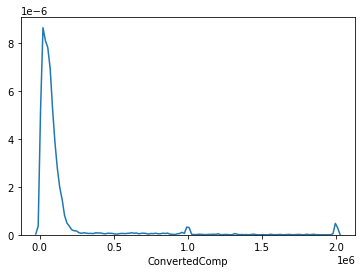

In [3]:
# your code goes here
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df["ConvertedComp"], "ConvertedComp", hist = False, kde = True)

plt.show()

Plot the histogram for the column `ConvertedComp`.


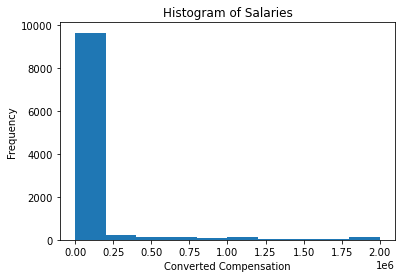

In [4]:
# your code goes here
df["ConvertedComp"].plot(kind="hist")

plt.title("Histogram of Salaries")
plt.ylabel("Frequency")
plt.xlabel("Converted Compensation")
plt.show()

What is the median of the column `ConvertedComp`?


In [5]:
# your code goes here
print("The median of ConvertedComp is", df["ConvertedComp"].median())
print("The median of Age is", df["Age"].median())

The median of ConvertedComp is 57745.0
The median of Age is 29.0


How many responders identified themselves only as a **Man**?


In [33]:
# your code goes here
print("Gender Value Count: ", df["Gender"].nunique())

print(df["Gender"].value_counts())

print(df["Gender"].eq("Man").sum(), "reponders gave the response Man")

Gender Value Count:  7
Man                                                            9650
Woman                                                           694
Non-binary, genderqueer, or gender non-conforming                56
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         9
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64
9650 reponders gave the response Man


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
# your code goes here
print("The median of ConvertedComp for Women is", df[df["Gender"].eq("Woman")]["ConvertedComp"].median())

The median of ConvertedComp for Women is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


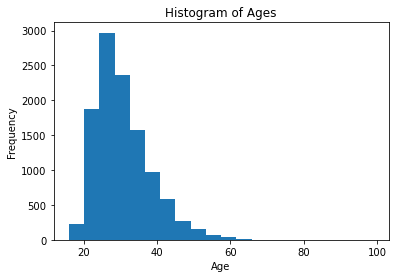

In [9]:
# your code goes here
df["Age"].plot(kind="hist", bins=20)

plt.title("Histogram of Ages")
plt.ylabel("Frequency")
plt.xlabel("Age")
plt.show()

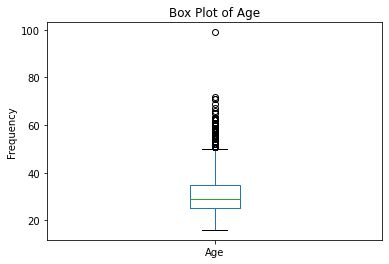

In [10]:
# your code goes here
df["Age"].plot(kind = "box")

plt.title("Box Plot of Age")
plt.ylabel("Frequency")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


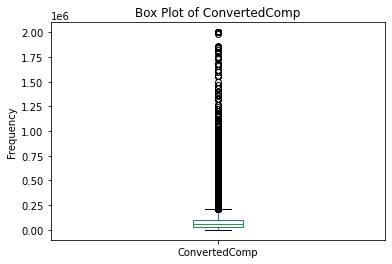

In [11]:
# your code goes here
df["ConvertedComp"].plot(kind = "box")

plt.title("Box Plot of ConvertedComp")
plt.ylabel("Frequency")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1

print("The upper quartile boundary is ", Q3)
print("The lower quartile boundary is ", Q1)
print("The inter quartile range is ", IQR)

The upper quartile boundary is  100000.0
The lower quartile boundary is  26868.0
The inter quartile range is  73132.0


Find out the upper and lower bounds.


In [13]:
# your code goes here
upper_bound = df["ConvertedComp"].max()
lower_bound = df["ConvertedComp"].min()
print("The upper bound is ", upper_bound, " and the lower bound is ", lower_bound)

The upper bound is  2000000.0  and the lower bound is  0.0


In [14]:
print("The median of ConvertedComp is", df["ConvertedComp"].median())
print("The mean of ConvertedComp is", df["ConvertedComp"].mean())

The median of ConvertedComp is 57745.0
The mean of ConvertedComp is 131596.7316197316


Identify how many outliers are there in the `ConvertedComp` column.


In [15]:
# your code goes here
high_outliers = df["ConvertedComp"].gt(Q3 + 1.5*IQR)
low_outliers = df["ConvertedComp"].lt(Q1 - 1.5*IQR)
print("High Outliers: ", high_outliers.sum())
print("Low Outliers: ", low_outliers.sum())

High Outliers:  879
Low Outliers:  0


In [16]:
high_outliers = df[df["ConvertedComp"].gt(Q3 + 1.5*IQR)]
high_outliers

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
13,32,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,Associate degree,"Information systems, information technology, o...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Indu...,21.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
45,100,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Woman,No,Bisexual,White or of European descent,No,Appropriate in length,Easy
46,102,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,37.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
60,128,"I am not primarily a developer, but I write co...",Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United Kingdom,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,30.0,Man,No,Bisexual,White or of European descent,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11296,24915,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Another engineering discipline (ex. civil, ele...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,27.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Neither easy nor difficult
11303,24931,I am a developer by profession,No,Less than once per year,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Switzerland,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers;Indu...,45.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
11350,25036,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","A business discipline (ex. accounting, finance...",...,Just as welcome now as I felt last year,NaN,48.0,Man,No,Straight / Heterosexual,White or of European descent,No,Too long,Neither easy nor difficult
11353,25047,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,39.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropria

In [17]:
low_outliers = df[df["ConvertedComp"].lt(Q1 - 1.5*IQR)]
low_outliers

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
new_df = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]

In [29]:
new_df

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,A lot more welcome now than last year,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,Somewhat l

In [30]:
#mean ConvertedComp after outliers removed
new_df["ConvertedComp"].mean()

59883.20838915799

In [31]:
#median ConvertedComp after outliers removed
new_df["ConvertedComp"].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [34]:
# your code goes here
df.corr()["Age"]

Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
